# PRAKTIKUM 3b
__Solusi Akar Persamaan Tak-Linear 2__

*Topik*
1. Metode Newton-Raphson
2. Metode _Secant_ 

<hr style="border:2px solid black"> </hr>

# 1 Metode Newton-Raphson
Metode _bisection_ dan _regula falsi_ yang telah dipelajari sebelumnya masih memiliki jumlah iterasi dan waktu komputasi yang cukup lama. Dengan tambahan informasi mengenai turunan dari fungsi $ f(x) $, metode Newton-Raphson dapat digunakan untuk mencari nilai akar dengan lebih cepat dibandingkan metode sebelumnya.

Persamaan iterasi metode Newton-Raphson didefinisikan sebagai berikut.
$$p_k = p_{k-1} - \frac{f(p_{k-1})}{f'(p_{k-1})}$$
untuk $ k = 1,2,3,\dots $ dan $p_0$ diketahui serta $f(x)$ terturunkan.

## _Simple Root_ dan _Double Root_
Persamaan dengan solusi _**simple root**_ adalah suatu persamaan yang memiliki akar tunggal. 

Contohnya, persamaan $ x^2-1=0 $ memiliki 2 akar tunggal, yaitu $ x_1=-1 $ dan $ x_2=1 $. Dengan kata lain, $x_1$ dan $x_2$ nilainya berbeda.

Persamaan dengan solusi _**double root**_ adalah suatu persamaan yang memiliki akar ganda, artinya satu persamaan memiliki 2 akar yang bernilai sama. 

Contohnya, persamaan $ x^2-2x+1=0 $ memiliki akar ganda, yaitu $ x_1=1 $ dan $ x_2=1 $.

Suatu persamaan dapat memiliki akar tunggal maupun ganda sekaligus. Misalnya, persamaan $f(x) = x^3-3x+2$ memiliki nilai akar yaitu $x_1=-2$, $x_2=1$ dan $x_3=1$. Perhatikan grafik fungsi ```f(x)``` berikut.

<div style="width: 500px;">
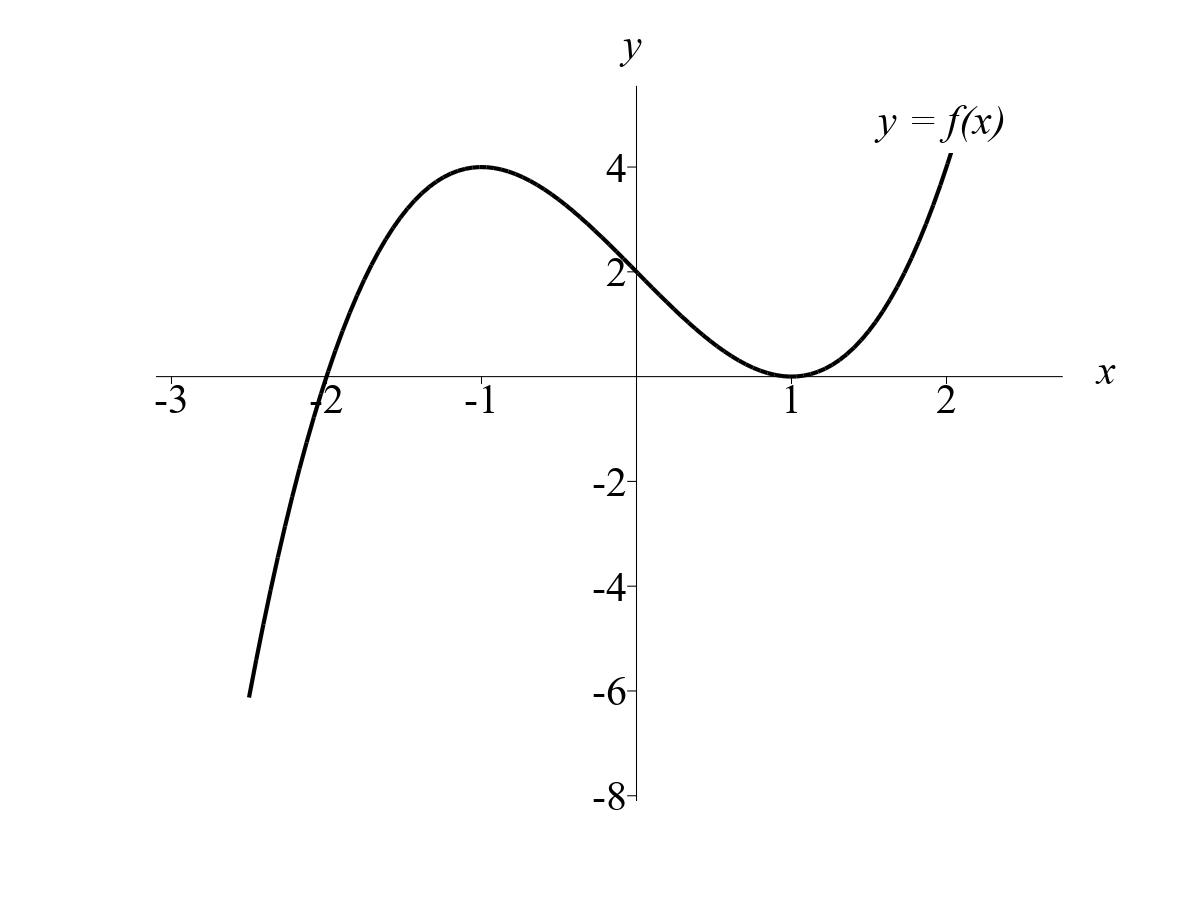

In [ ]:
#= %%METODE NEWTON-RAPHSON 
% [pk, flag, M] = newtonRaphson (f,df,p0)
% Input  : f    -> fungsi f
%        : df   -> fungsi turunan dari f
%          p0   -> starting value
% Output : pk   -> nilai akar
%          flag -> tanda : 0 -> berhasil
%                          1 -> gagal 
%          M    -> matriks yang berisi nilai iterasi, hampiran akar dan
%                  galat
=#
function newtonRaphson(f,df,p0)
    # Definisikan nilai toleransi, maksimum iterasi dan tebakan awal yang telah ditentukan.
    delta = 10^-7;
    maxi = 100;
    pk = p0
    M = [0 pk NaN];
    # Mulai langkah iterasi
    flag = 1;
    for k = 2:maxi
        # Rumus metode Newton-Raphson
        pk1 = pk
        pk = pk1 - f(pk1)/df(pk1); 
        # Hitung nilai galat mutlak dan relatif
        err = abs(pk-pk1);
        rel = 2*err/(abs(pk)+eps());
        M = [M; [k-1 pk err]]
        # Kriteria penghentian iterasi jika galat memenuhi toleransi.
        if err<delta || rel<delta
            flag = 0;
            break
        end
    end 
    return pk, flag, M
end 

### Contoh 1 : Solusi _Simple Root_
Diberikan fungsi $ f(x)=x^3-3x+2 $ dan $ p_0=-2.4 $. Berikut merupakan langkah-langkah untuk mencari hampiran akar $ f(x)=0 $ yaitu $ P=-2 $ menggunakan metode Newton-Raphson serta menunjukkan bahwa metode Newton-Raphson memiliki ordo kekonvergenan $ R=2 $ untuk _simple root_. 

**Langkah 1** : Hitung fungsi turunan dari $ f(x) $.

Diketahui bahwa $ f(x)=x^3-3x+2 $, sehingga turunan fungsi $ f $ adalah
$$ f'(x)=3x^2-3 $$

**Langkah 2** : Definisikan fungsi $ f $ dan turunannya $ f' $ serta nilai awal $ p_0 $.

In [ ]:
f(x) = x^3-3*x+2;
df(x) = 3*x^2-3;
p0 = -2.4; 

**Langkah 3** : Hitung nilai hampiran akar menggunakan program Newton-Raphson.

In [ ]:
pk,flag,M = newtonRaphson(f,df,p0)
@show pk
@show flag
M

**Langkah 4** : Hitung nilai galat $ E_k=P-p_k $.

In [ ]:
P = -2;
Ek = P.-M[:,2] 

**Langkah 5** : Hitung nilai rasio galat $ |E_{k+1}|/|E_k|^R $. Pilih $R=2$

In [ ]:
R = 2;
RasioGalat = abs.(Ek[2:end]) ./ abs.(Ek[1:end-1].^R)

Berdasarkan hasil yang didapatkan, nilai $ |E_{k+1}|/|E_k|^2 $ konvergen menuju suatu bilangan, yaitu $ \dfrac{2}{3} $. 

Jadi, metode Newton-Raphson memiliki ordo kekonvergenan $ R=2 $ untuk _single root_.

### Contoh 2 : Solusi _Double Root_

Diberikan fungsi $ f(x)=x^3-3x+2 $ dengan $ p_0=1.2 $. Berikut merupakan langkah-langkah untuk mencari nilai hampiran akar $ f(x)=0 $ yaitu $ P=1 $ menggunakan metode Newton-Raphson serta menunjukkan bahwa metode Newton-Raphson memiliki ordo kekonvergenan $ R=1 $ untuk _double root_. 

**Langkah 1** : Hitung fungsi turunan dari $ f(x) $.

Diketahui bahwa $ f(x)=x^3-3x+2 $, sehingga turunan fungsi $ f $ adalah
$$ f'(x)=3x^2-3 $$

**Langkah 2** : Definisikan fungsi $ f $ dan turunannya $ f' $ serta nilai awal $ p_0 $.

In [ ]:
f(x) = x^3-3*x+2;
df(x) = 3*x^2-3;
p0 = 1.2; 

**Langkah 3** : Hitung nilai hampiran akar menggunakan program Newton-Raphson.

In [ ]:
pk, flag, M = newtonRaphson(f,df,p0)
@show pk
@show flag
M

**Langkah 4** : Hitung nilai galat $ E_k=P-p_k $.

In [ ]:
P = 1;
Ek = P .- M[:,2] 

**Langkah 5** : Hitung nilai rasio galat $ |E_{k+1}|/|E_k|^R $. Pilih $R=1$

In [ ]:
R = 1;
RasioGalat = abs.(Ek[2:end]) ./ abs.(Ek[1:end-1].^R)

Berdasarkan hasil yang didapatkan, nilai $ |E_{k+1}|/|E_k|^1 $ konvergen menuju suatu bilangan, yaitu $\dfrac{1}{2}$. 

Jadi, metode Newton-Raphson memiliki ordo kekonvergenan $ R=1 $ untuk _double root_.

# 2 Metode _Secant_
Metode _secant_ merupakan metode alternatif yang digunakan, apabila metode Newton-Raphson tidak mungkin untuk dicari fungsi turunannya. 

Metode _secant_ memiliki ordo kekonvergenan yaitu $ R=\dfrac{1+\sqrt{5}}{2}\approx1.618 $ yang hampir mendekati metode Newton-Raphson yaitu $ R=2 $.

Bentuk umum dari secant adalah
$$ p_{k+1}=p_k - f(p_{k}) \dfrac{p_k-p_{k-1}}{f(p_k)-f(p_{k-1})}$$

In [ ]:
#=
%%METODE SECANT
% [pk, flag, M] = secant(f,p0,p1)
% Input  : f    -> fungsi f 
%          p0,p1-> starting value
% Output : pk   -> nilai akar
%          flag -> tanda 
%                  0 -> berhasil
%                  1 -> gagal 
%          M    -> matriks yang berisi nilai iterasi, hampiran akar dan galat
=#
function secant(f,p0,p1)
    # Definisikan nilai toleransi, maksimum iterasi dan tebakan awal yang telah ditentukan.
    delta = 10^-12;
    maxi = 100; 
    M = [0 p0 NaN
         1 p1 NaN];
    p = [p0 p1];
    pk = p1;
    flag = 1; 
    # Mulai langkah iterasi
    for k = 2:maxi
        # rumus metode secant 
        pk=p[k]-f(p[k])*(p[k]-p[k-1])/(f(p[k])-f(p[k-1]));
        p = [p pk]
        # Hitung nilai galat mutlak dan relatif
        err=abs(p[k+1]-p[k]);
        rel=2*err/(abs(p[k]) + eps());
        M = [M; [k pk err]] 
        # Kriteria penghentian iterasi jika galat memenuhi toleransi.
        if err<delta || rel<delta
            flag = 0;
            break
        end
    end
    return pk, flag, M
end 

### Contoh 3
Diberikan fungsi $ f(x)=x^3-3x+2 $ dengan $ p_0=-2.6 $ dan $ p_1=-2.4 $. Berikut merupakan langkah-langkah untuk mencari nilai hampiran akar $ f(x)=0 $ yaitu $ P=-2 $ menggunakan metode _secant_ serta menunjukkan bahwa metode _secant_ memiliki ordo kekonvergenan $ R=\dfrac{1+\sqrt{5}}{2} $ untuk _simple root_.

__Langkah 1__ : Definisikan fungsi $ f $ serta nilai awal $ p_0 $ dan $ p_1 $.

In [ ]:
f(x) = x^3-3*x+2;
p0 = -2.6;
p1 = -2.4;

__Langkah 2__ : Hitung nilai hampiran akar $ f(x)=0 $ menggunakan metode _secant_ di atas

In [ ]:
pk, flag, M = secant(f,p0,p1)
@show pk
@show flag
M

**Langkah 3** : Hitung nilai galat $ E_k=P-p_k $.

In [ ]:
P = -2;
Ek = P .- M[:,2]

**Langkah 5** : Hitung nilai rasio galat $ |E_{k+1}|/|E_k|^R $. Pilih $ R=\dfrac{1+\sqrt{5}}{2} $

In [ ]:
R = (1+sqrt(5))/2;
RasioGalat = abs.(Ek[2:end]) ./ abs.(Ek[1:end-1].^R)

Berdasarkan hasil yang didapatkan, nilai $ |E_{k+1}|/|E_k|^R $ konvergen menuju suatu bilangan, yaitu $0.8$. 

Jadi, metode Newton-Raphson memiliki ordo kekonvergenan $ R=\dfrac{1+\sqrt{5}}{2} $ untuk _single root_.

<hr style="border:2px solid black"> </hr>

# Soal Latihan
Kerjakan soal berikut pada saat kegiatan praktikum berlangsung.

`Nama: ________`

`NIM: ________`

### Soal 1
Ulangi langkah-langkah pada **Contoh 1** untuk mencari nilai hampiran akar persamaan dari $$ f(x)=x^3+3x^2-4 $$ dengan nilai awal $ p_0=1.2 $ menggunakan metode Newton-Raphson.

### Soal 2
Ulangi langkah-langkah pada **Contoh 2** untuk mencari nilai hampiran akar persamaan dari $$ f(x)=x^3+3x^2-4 $$ dengan nilai awal $ p_0=-2.4 $ menggunakan metode Newton-Raphson.

### Soal 3
Diberikan $ f(x)=x^3+3x^2-4 $ dengan nilai $ p_0=1.6 $ dan $ p_1=1.4 $. 

Carilah nilai hampiran akar persamaan $ f(x)=0 $ menggunakan metode _secant_ serta tunjukkan bahwa metode _secant_ memiliki ordo kekonvergenan $ R=1 $ untuk _double root_. 